<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


<!-- ![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif) -->


Several examples of an unsuccessful landing are shown here:


<!-- ![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif) -->


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# To plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y, y_predict, title=''):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'{title} Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

# Fix random state to get repeatable results

In [4]:
import random
# my_random_state = random.randint(0, 999999)
my_random_state = 0
random.seed(my_random_state)
print(my_random_state)

0


## Load the dataframe


Load the data


In [5]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [6]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
# X = pd.read_csv(text2)

In [9]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [10]:
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
Y = data['Class'].to_numpy()
print(type(Y))
print(len(Y))
print(Y[:5])

<class 'numpy.ndarray'>
90
[0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [12]:
# students get this 
transform = preprocessing.StandardScaler()
X_st = transform.fit_transform(X)
print(type(X_st))
print(len(X_st))

<class 'numpy.ndarray'>
90


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_st, Y, test_size=0.2, random_state=my_random_state)

we can see we only have 18 test samples.


In [14]:
Y_test.shape

(18,)

In [15]:
print('train:', X_train.shape, Y_train.shape)
print('test: ', X_test.shape, Y_test.shape)

train: (72, 83) (72,)
test:  (18, 83) (18,)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
lr = LogisticRegression()
parameters ={
    'C':[0.01, 0.1, 1],
    'penalty':['l2'],
    'solver':['lbfgs']
}  
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10
)
logreg_cv.fit(X_train, Y_train)
print('Best parameters')
for k, v in logreg_cv.best_params_.items():
    print(f'{k:<18} {v}')

print(f'Accuracy on train data: {logreg_cv.best_score_:.3f}')
print(f'Accuracy on test data:  {logreg_cv.score(X_test, Y_test):.3f}')

Best parameters
C                  0.1
penalty            l2
solver             lbfgs
Accuracy on train data: 0.850
Accuracy on test data:  0.833


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.85


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
print(logreg_cv.score(X_test, Y_test))

0.8333333333333334


Lets look at the confusion matrix:


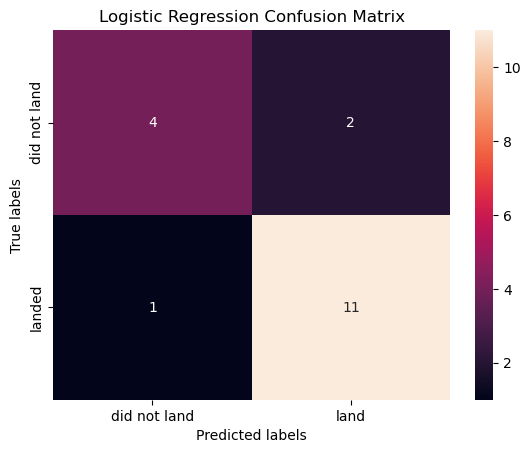

In [19]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'Logistic Regression')

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {
    'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()
svm = SVC(probability=True)
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10
)
svm_cv.fit(X_train, Y_train)
print('Best parameters:')
for k, v in svm_cv.best_params_.items():
    print(f'{k:<18} {v}')

print(f'Accuracy on train data: {svm_cv.best_score_:.3f}')
print(f'Accuracy on test data:  {svm_cv.score(X_test, Y_test):.3f}')

Best parameters:
C                  1.0
gamma              0.03162277660168379
kernel             sigmoid
Accuracy on train data: 0.850
Accuracy on test data:  0.833


In [21]:
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.85


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
print(svm_cv.score(X_test, Y_test))

0.8333333333333334


We can plot the confusion matrix


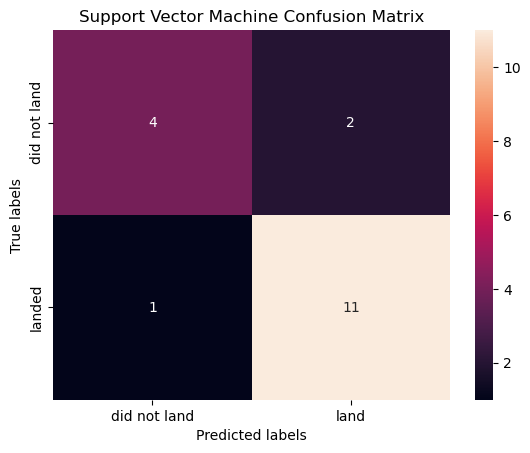

In [23]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'Support Vector Machine')

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
import warnings

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier(random_state=my_random_state)
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10
)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    tree_cv.fit(X_train, Y_train)
print('Best parameters:')
for k, v in tree_cv.best_params_.items():
    print(f'{k:<18} {v}')
    
print(f'Accuracy on train data: {tree_cv.best_score_:.3f}')
print(f'Accuracy on test data:  {tree_cv.score(X_test, Y_test):.3f}')

Best parameters:
criterion          entropy
max_depth          6
max_features       sqrt
min_samples_leaf   1
min_samples_split  10
splitter           best
Accuracy on train data: 0.875
Accuracy on test data:  0.889


In [25]:
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
print(tree_cv.score(X_test, Y_test))

0.8888888888888888


We can plot the confusion matrix


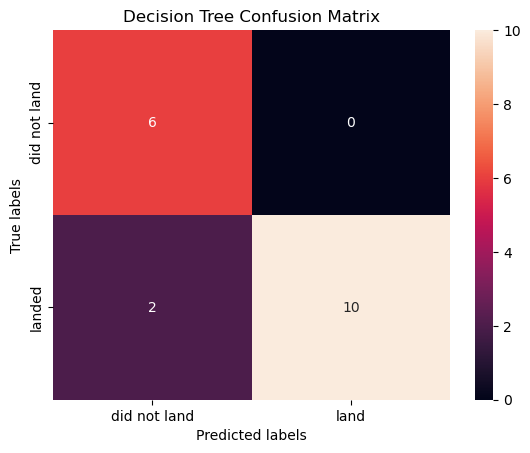

In [78]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'Decision Tree')

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10
)
knn_cv.fit(X_train, Y_train)
print('Best parameters:')
for k, v in knn_cv.best_params_.items():
    print(f'{k:<18} {v}')

print(f'Accuracy on train data: {knn_cv.best_score_:.3f}')
print(f'Accuracy on test data:  {knn_cv.score(X_test, Y_test):.3f}')

Best parameters:
algorithm          auto
n_neighbors        8
p                  1
Accuracy on train data: 0.864
Accuracy on test data:  0.778


In [29]:
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8642857142857142


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [30]:
print(knn_cv.score(X_test, Y_test))

0.7777777777777778


We can plot the confusion matrix


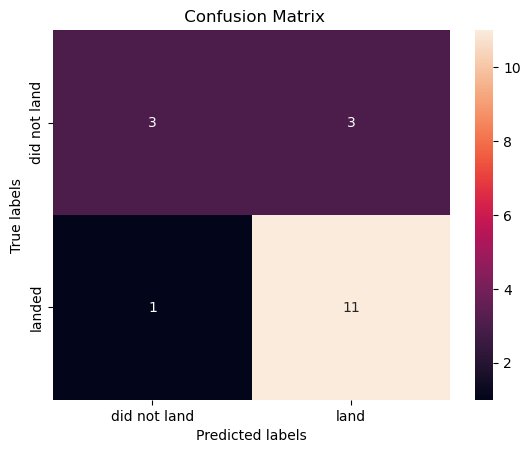

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [32]:
models = {
    'Logistic Regression' : logreg_cv.score(X_test, Y_test),
    'Support Vector Machine' : svm_cv.score(X_test, Y_test),
    'Decision Tree' : tree_cv.score(X_test, Y_test),
    'K-Nearest Neighbor' : knn_cv.score(X_test, Y_test)
}
print(f'Best model: {max(models, key=models.get)}')
print(f'Accuracy: {max(models.values()):.3f}')

Best model: Decision Tree
Accuracy: 0.889


# Additional task: 
Visualize the built model accuracy for all built classification models, in a bar chart

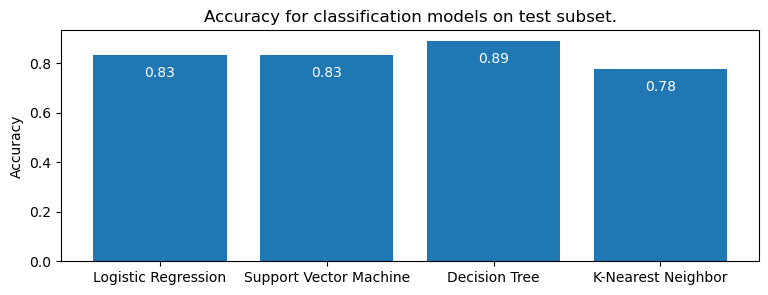

In [34]:
plt.figure(figsize=(9, 3))
bars = plt.bar(models.keys(), models.values())
for bar, y_val in zip(bars, models.values()):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        y_val - 0.1, 
        f'{y_val:.2f}', 
        ha='center', 
        va='bottom', 
        color='white'
    )
plt.title('Accuracy for classification models on test subset.')
plt.ylabel('Accuracy')
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


# Additional data wrangling
Lets find the best range of features that leads to the most successful first stage landings

In [35]:
pd.set_option('display.max_columns', None)
data[(data['Class'] == 1) & 
     (data['Orbit'] == 'ISS') &
     (data['BoosterVersion'] == 'Falcon 9') &
     (data['LaunchSite'] == 'KSC LC 39A') 
    ]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
26,27,2017-02-19,Falcon 9,2490.0,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1031,-80.603956,28.608058,1
31,32,2017-06-03,Falcon 9,2708.0,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1035,-80.603956,28.608058,1
35,36,2017-08-14,Falcon 9,2910.0,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1039,-80.603956,28.608058,1
62,63,2019-03-02,Falcon 9,12259.0,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
78,79,2020-05-30,Falcon 9,9525.0,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1


In [36]:
data['Block'].value_counts()

Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64

In [37]:
data.groupby('Block')['Class'].mean()

Block
1.0    0.210526
2.0    1.000000
3.0    0.733333
4.0    0.545455
5.0    0.846154
Name: Class, dtype: float64

In [38]:
data[data['Reused'] == True]['Flights'].value_counts()

Flights
2    19
3     8
4     6
5     2
6     2
Name: count, dtype: int64

In [39]:
data['Flights'].value_counts()

Flights
1    53
2    19
3     8
4     6
5     2
6     2
Name: count, dtype: int64

Probability of successful landing by flights number

In [40]:
data.groupby('Flights')['Class'].mean()

Flights
1    0.584906
2    0.789474
3    0.875000
4    0.666667
5    0.500000
6    1.000000
Name: Class, dtype: float64

In [41]:
data[data['Flights'] == 3]['Class'].mean()

0.875

In [42]:
data[data['Class'] == 1]['LandingPad'].value_counts()

LandingPad
5e9e3032383ecb6bb234e7ca    30
5e9e3032383ecb267a34e7c7    12
5e9e3033383ecbb9e534e7cc    11
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

Probability of successful first stage landing by landing pads

In [43]:
data.groupby('LandingPad')['Class'].mean()

LandingPad
5e9e3032383ecb267a34e7c7    0.923077
5e9e3032383ecb554034e7c9    1.000000
5e9e3032383ecb6bb234e7ca    0.857143
5e9e3032383ecb761634e7cb    0.000000
5e9e3033383ecbb9e534e7cc    0.916667
Name: Class, dtype: float64

Details of 5e9e3032383ecb267a34e7c7 landing pad

In [44]:

import requests

landing_pad = "5e9e3032383ecb267a34e7c7"
url = f"https://api.spacexdata.com/v4/landpads/{landing_pad}"
response = requests.get(url).json()
for k, v in response.items():
    print(f"{k:<20} {v}")

images               {'large': ['https://i.imgur.com/KHBk6jO.png']}
name                 LZ-1
full_name            Landing Zone 1
status               active
type                 RTLS
locality             Cape Canaveral
region               Florida
latitude             28.485833
longitude            -80.544444
landing_attempts     21
landing_successes    20
wikipedia            https://en.wikipedia.org/wiki/Landing_Zones_1_and_2
details              SpaceX's first east coast landing pad is Landing Zone 1, where the historic first Falcon 9 landing occurred in December 2015. LC-13 was originally used as a launch pad for early Atlas missiles and rockets from Lockheed Martin. LC-1 was later expanded to include Landing Zone 2 for side booster RTLS Falcon Heavy missions, and it was first used in February 2018 for that purpose.
launches             ['5eb87cefffd86e000604b342', '5eb87cf9ffd86e000604b349', '5eb87cfeffd86e000604b34d', '5eb87d01ffd86e000604b350', '5eb87d03ffd86e000604b352', '5eb8

In [45]:
X[(X['Orbit_ISS'] == 1) &
  (X['LaunchSite_KSC LC 39A'] == 1)
]

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
26,27.0,2490.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
31,32.0,2708.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
35,36.0,2910.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
62,63.0,12259.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
78,79.0,9525.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [46]:
c_name = 'Legs'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
Legs,,
True,0.830986,71
False,0.052632,19


In [47]:
c_name = 'Reused'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
Reused,,
True,0.783784,37
False,0.584906,53


In [48]:
c_name = 'GridFins'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
GridFins,,
True,0.828571,70
False,0.100000,20


In [49]:
c_name = 'Serial'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
Serial,,
B1062,1.000000,1
B1021,1.000000,2
B1036,1.000000,2
B1035,1.000000,2
B1032,1.000000,2
B1031,1.000000,2
B1042,1.000000,1
B1029,1.000000,2
B1043,1.000000,1


In [50]:
data[data['Orbit'] == 'SSO']['LaunchSite'].value_counts()

LaunchSite
VAFB SLC 4E     4
CCAFS SLC 40    1
Name: count, dtype: int64

In [51]:
data[data['Orbit'] == 'VLEO']['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    9
KSC LC 39A      5
Name: count, dtype: int64

In [52]:
data[data['Orbit'] == 'LEO']['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    5
KSC LC 39A      2
Name: count, dtype: int64

In [53]:
data[data['Orbit'] == 'MEO']['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    3
Name: count, dtype: int64

In [54]:
data[data['Orbit'] == 'PO']['LaunchSite'].value_counts()

LaunchSite
VAFB SLC 4E    9
Name: count, dtype: int64

In [55]:
data[data['Orbit'] == 'ISS']['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    16
KSC LC 39A       5
Name: count, dtype: int64

In [56]:
data[data['Orbit'] == 'GTO']['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    18
KSC LC 39A       9
Name: count, dtype: int64

In [57]:
c_name = 'Orbit'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
Orbit,,
ES-L1,1.000000,1
GEO,1.000000,1
HEO,1.000000,1
SSO,1.000000,5
VLEO,0.857143,14
LEO,0.714286,7
MEO,0.666667,3
PO,0.666667,9
ISS,0.619048,21


In [58]:
# data[data['']]

In [59]:
c_name = 'ReusedCount'
d_1 = data.groupby(c_name)['Class'].mean().sort_index()
d_2 = data[c_name].value_counts().sort_index()
d_combined = pd.concat([d_1, d_2], axis=1).sort_values('Class', ascending=False)
d_combined

,Class,count
ReusedCount,,
5,1.000000,11
2,0.888889,9
1,0.833333,24
3,0.833333,12
4,0.750000,4
0,0.266667,30


### Create synthetic dataset to predict the successful landing

Remind feature columns 

In [60]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [61]:
import itertools

my_FlightNumber = [90]
my_PayloadMass = np.arange(2490, 12259+1, 1000)
my_Flights = [1, 2, 3]
my_Block = [2, 3, 5]
my_ReusedCount = [1, 2, 3, 4, 5]
# my_ReusedCount = [0]
# my_Orbit = ['SSO', 'VLEO', 'LEO', 'MEO', 'PO', 'ISS']
my_Orbit_ES_L1 = [0]
my_Orbit_GEO = [0]
my_Orbit_GTO = [0]
my_Orbit_HEO = [0]
my_Orbit_ISS = [0, 1]
my_Orbit_LEO = [0, 1]
my_Orbit_MEO = [0, 1]
my_Orbit_PO = [0, 1]
my_Orbit_SO = [0]
my_Orbit_SSO = [0, 1]
my_Orbit_VLEO = [0, 1]
# my_LaunchSite
my_LaunchSite_CCAFS_SLC_40 = [0]
my_LaunchSite_KSC_LC_39A = [1]
my_LaunchSite_VAFB_SLC_4E = [0]

# my_LandingPad
my_LandingPad_5e9e3032383ecb267a34e7c7 = [1]
my_LandingPad_5e9e3032383ecb554034e7c9 = [0]
my_LandingPad_5e9e3032383ecb6bb234e7ca = [0]
my_LandingPad_5e9e3032383ecb761634e7cb = [0]
my_LandingPad_5e9e3033383ecbb9e534e7cc = [0]

# my_Serial
my_Serial_B0003 = [0]
my_Serial_B0005 = [0]
my_Serial_B0007 = [0]
my_Serial_B1003 = [0]
my_Serial_B1004 = [0]
my_Serial_B1005 = [0]
my_Serial_B1006 = [0, 1]
my_Serial_B1007 = [0, 1]
my_Serial_B1008 = [0]
my_Serial_B1010 = [0]
my_Serial_B1011 = [0]
my_Serial_B1012 = [0]
my_Serial_B1013 = [0, 1]
my_Serial_B1015 = [0]
my_Serial_B1016 = [0]
my_Serial_B1017 = [0]
my_Serial_B1018 = [0]
my_Serial_B1019 = [0, 1]
my_Serial_B1020 = [0]
my_Serial_B1021 = [0, 1]
my_Serial_B1022 = [0, 1]
my_Serial_B1023 = [0, 1]
my_Serial_B1025 = [0, 1]
my_Serial_B1026 = [0, 1]
my_Serial_B1028 = [0]
my_Serial_B1029 = [0, 1]
my_Serial_B1030 = [0]
my_Serial_B1031 = [0, 1]
my_Serial_B1032 = [0, 1]
my_Serial_B1034 = [0]
my_Serial_B1035 = [0, 1]
my_Serial_B1036 = [0, 1]
my_Serial_B1037 = [0]
my_Serial_B1038 = [0, 1]
my_Serial_B1039 = [0]
my_Serial_B1040 = [0]
my_Serial_B1041 = [0]
my_Serial_B1042 = [0, 1]
my_Serial_B1043 = [0, 1]
my_Serial_B1044 = [0]
my_Serial_B1045 = [0]
my_Serial_B1046 = [0]
my_Serial_B1047 = [0]
my_Serial_B1048 = [0]
my_Serial_B1049 = [0, 1]
my_Serial_B1050 = [0]
my_Serial_B1051 = [0, 1]
my_Serial_B1054 = [0]
my_Serial_B1056 = [0]
my_Serial_B1058 = [0, 1]
my_Serial_B1059 = [0, 1]
my_Serial_B1060 = [0, 1]
my_Serial_B1062 = [0, 1]
my_GridFins_False = [0]
my_GridFins_True = [1]
my_Reused_False = [0]
my_Reused_True = [1]
my_Legs_False = [0]
my_Legs_True = [1]


def test_df():
    my_test_df = pd.DataFrame(list(itertools.product(
        my_FlightNumber, 
        my_PayloadMass, 
        my_Flights, 
        my_Block,
        my_ReusedCount,
        my_Orbit_ES_L1,
        my_Orbit_GEO,
        my_Orbit_GTO,
        my_Orbit_HEO,
        my_Orbit_ISS,
        my_Orbit_LEO,
        my_Orbit_MEO,
        my_Orbit_PO,
        my_Orbit_SO,
        my_Orbit_SSO,
        my_Orbit_VLEO,
        my_LaunchSite_CCAFS_SLC_40,
        my_LaunchSite_KSC_LC_39A,
        my_LaunchSite_VAFB_SLC_4E,
        my_LandingPad_5e9e3032383ecb267a34e7c7,
        my_LandingPad_5e9e3032383ecb554034e7c9,
        my_LandingPad_5e9e3032383ecb6bb234e7ca,
        my_LandingPad_5e9e3032383ecb761634e7cb,
        my_LandingPad_5e9e3033383ecbb9e534e7cc,
        [0],  # my_Serial_B0003,
        [0],  # my_Serial_B0005,
        [0],  # my_Serial_B0007,
        [0],  # my_Serial_B1003,
        [0],  # my_Serial_B1004,
        [0],  # my_Serial_B1005,
        [0],  # my_Serial_B1006,
        [0],  # my_Serial_B1007,
        [0],  # my_Serial_B1008,
        [0],  # my_Serial_B1010,
        [0],  # my_Serial_B1011,
        [0],  # my_Serial_B1012,
        [0],  # my_Serial_B1013,
        [0],  # my_Serial_B1015,
        [0],  # my_Serial_B1016,
        [0],  # my_Serial_B1017,
        [0],  # my_Serial_B1018,
        [0],  # my_Serial_B1019,
        [0],  # my_Serial_B1020,
        [0],  # my_Serial_B1021,
        [0],  # my_Serial_B1022,
        [0],  # my_Serial_B1023,
        [0],  # my_Serial_B1025,
        [0],  # my_Serial_B1026,
        [0],  # my_Serial_B1028,
        [0],  # my_Serial_B1029,
        [0],  # my_Serial_B1030,
        [0],  # my_Serial_B1031,
        [0],  # my_Serial_B1032,
        [0],  # my_Serial_B1034,
        [0],  # my_Serial_B1035,
        [0],  # my_Serial_B1036,
        [0],  # my_Serial_B1037,
        [0],  # my_Serial_B1038,
        [0],  # my_Serial_B1039,
        [0],  # my_Serial_B1040,
        [0],  # my_Serial_B1041,
        [0],  # my_Serial_B1042,
        [0],  # my_Serial_B1043,
        [0],  # my_Serial_B1044,
        [0],  # my_Serial_B1045,
        [0],  # my_Serial_B1046,
        [0],  # my_Serial_B1047,
        [0],  # my_Serial_B1048,
        [0],  # my_Serial_B1049,
        [0],  # my_Serial_B1050,
        [0],  # my_Serial_B1051,
        [0],  # my_Serial_B1054,
        [0],  # my_Serial_B1056,
        [0],  # my_Serial_B1058,
        [0],  # my_Serial_B1059,
        [0],  # my_Serial_B1060,
        [0],  # my_Serial_B1062,
        my_GridFins_False,
        my_GridFins_True,
        my_Reused_False,
        my_Reused_True,
        my_Legs_False,
        my_Legs_True
        )),
        columns = [
            'FlightNumber',
            'PayloadMass',
            'Flights',
            'Block',
            'ReusedCount',
            'Orbit_ES-L1',
            'Orbit_GEO',
            'Orbit_GTO',
            'Orbit_HEO',
            'Orbit_ISS',
            'Orbit_LEO',
            'Orbit_MEO',
            'Orbit_PO',
            'Orbit_SO',
            'Orbit_SSO',
            'Orbit_VLEO',
            'LaunchSite_CCAFS SLC 40',
            'LaunchSite_KSC LC 39A',
            'LaunchSite_VAFB SLC 4E',
            'LandingPad_5e9e3032383ecb267a34e7c7',
            'LandingPad_5e9e3032383ecb554034e7c9',
            'LandingPad_5e9e3032383ecb6bb234e7ca',
            'LandingPad_5e9e3032383ecb761634e7cb',
            'LandingPad_5e9e3033383ecbb9e534e7cc',
            'Serial_B0003',
            'Serial_B0005',
            'Serial_B0007',
            'Serial_B1003',
            'Serial_B1004',
            'Serial_B1005',
            'Serial_B1006',
            'Serial_B1007',
            'Serial_B1008',
            'Serial_B1010',
            'Serial_B1011',
            'Serial_B1012',
            'Serial_B1013',
            'Serial_B1015',
            'Serial_B1016',
            'Serial_B1017',
            'Serial_B1018',
            'Serial_B1019',
            'Serial_B1020',
            'Serial_B1021',
            'Serial_B1022',
            'Serial_B1023',
            'Serial_B1025',
            'Serial_B1026',
            'Serial_B1028',
            'Serial_B1029',
            'Serial_B1030',
            'Serial_B1031',
            'Serial_B1032',
            'Serial_B1034',
            'Serial_B1035',
            'Serial_B1036',
            'Serial_B1037',
            'Serial_B1038',
            'Serial_B1039',
            'Serial_B1040',
            'Serial_B1041',
            'Serial_B1042',
            'Serial_B1043',
            'Serial_B1044',
            'Serial_B1045',
            'Serial_B1046',
            'Serial_B1047',
            'Serial_B1048',
            'Serial_B1049',
            'Serial_B1050',
            'Serial_B1051',
            'Serial_B1054',
            'Serial_B1056',
            'Serial_B1058',
            'Serial_B1059',
            'Serial_B1060',
            'Serial_B1062',
            'GridFins_False',
            'GridFins_True',
            'Reused_False',
            'Reused_True',
            'Legs_False',
            'Legs_True'
        ])

    my_test_df_filtered = my_test_df[my_test_df[[
        'Orbit_ES-L1',
        'Orbit_GEO',
        'Orbit_GTO',
        'Orbit_HEO',
        'Orbit_ISS',
        'Orbit_LEO',
        'Orbit_MEO',
        'Orbit_PO',
        'Orbit_SO',
        'Orbit_SSO',
        'Orbit_VLEO']].sum(axis=1) == 1]

    my_Serial_list = ['Serial_B1006', 'Serial_B1007', 'Serial_B1013', 'Serial_B1019', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1029', 'Serial_B1031', 'Serial_B1032', 'Serial_B1035', 'Serial_B1036', 'Serial_B1038', 'Serial_B1042', 'Serial_B1043', 'Serial_B1049', 'Serial_B1051', 'Serial_B1058', 'Serial_B1059', 'Serial_B1060', 'Serial_B1062']
    for i in range(my_test_df_filtered.shape[0]):
        serial = random.choice(my_Serial_list, )
        my_test_df_filtered.iloc[i][serial] = 1
    return my_test_df_filtered

Check the probability of first stage successful landing using optimised parameters. We calc 1000 times as serial_number_* columns we fill by generating random values as their number as too high for calculating direct combinations or all parameters. After all we take the mean probability of 1000 experiments (each of them has 540 rows with different input features for further prediction) 

Logistic Regression

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

n = 1
proba_test = []
for _ in range(n):
    X_synth_test_df = test_df()
    X_synth_test = X_synth_test_df.values
    proba_mean = np.array([c[1] for c in logreg_cv.predict_proba(X_synth_test)]).mean()
    proba_test.append(proba_mean)
proba_test_mean_synth_logreg = sum(proba_test)/n
print('Mean probability of success in', n, 'tests:', proba_test_mean_synth_logreg)

Mean probability of success in 1 tests: 1.0


In [63]:
for el in logreg_cv.predict_proba(X_synth_test):
    print(el)

[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[2.22044605e-16 1.00000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[2.22044605e-16 1.00000000e+00]
[4.4408921e-16 1.0000000e+00]
[4.4408921e-16 1.0000000e+00]
[4

Support Vector Machine

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

n = 1
proba_test = []
for _ in range(n):
    X_synth_test_df = test_df()
    X_synth_test = X_synth_test_df.values
    proba_mean = np.array([c[1] for c in svm_cv.predict_proba(X_synth_test)]).mean()
    proba_test.append(proba_mean)
proba_test_mean_synth_svm = sum(proba_test)/n
print('Mean probability of success in', n, 'tests:', proba_test_mean_synth_svm)


Mean probability of success in 1 tests: 0.5727212736753935


In [65]:
for el in svm_cv.predict_proba(X_synth_test):
    print(el)

[0.42654499 0.57345501]
[0.42656277 0.57343723]
[0.42654989 0.57345011]
[0.42656812 0.57343188]
[0.42655566 0.57344434]
[0.42652881 0.57347119]
[0.42661842 0.57338158]
[0.42662068 0.57337932]
[0.42662694 0.57337306]
[0.42662573 0.57337427]
[0.42663232 0.57336768]
[0.42660741 0.57339259]
[0.42668667 0.57331333]
[0.42669835 0.57330165]
[0.42669458 0.57330542]
[0.42670661 0.57329339]
[0.42669959 0.57330041]
[0.42666284 0.57333716]
[0.42674649 0.57325351]
[0.42675375 0.57324625]
[0.42675116 0.57324884]
[0.42676835 0.57323165]
[0.42676188 0.57323812]
[0.42674048 0.57325952]
[0.42680517 0.57319483]
[0.42682137 0.57317863]
[0.42681506 0.57318494]
[0.42682529 0.57317471]
[0.42681937 0.57318063]
[0.42679963 0.57320037]
[0.42662711 0.57337289]
[0.42664736 0.57335264]
[0.42663555 0.57336445]
[0.42665227 0.57334773]
[0.42664083 0.57335917]
[0.42662021 0.57337979]
[0.42669468 0.57330532]
[0.42670042 0.57329958]
[0.42670614 0.57329386]
[0.426718 0.573282]
[0.42671104 0.57328896]
[0.42668457 0.573315

In [66]:
for el in svm_cv.predict_proba(X_test):
    print(el)

[0.95517578 0.04482422]
[0.63981678 0.36018322]
[0.09570659 0.90429341]
[0.22161242 0.77838758]
[0.15916817 0.84083183]
[0.86132949 0.13867051]
[0.20706045 0.79293955]
[0.07691221 0.92308779]
[0.11036974 0.88963026]
[0.16076502 0.83923498]
[0.57332869 0.42667131]
[0.15322338 0.84677662]
[0.06027675 0.93972325]
[0.16221493 0.83778507]
[0.92204382 0.07795618]
[0.12138749 0.87861251]
[0.16695113 0.83304887]
[0.150513 0.849487]


Decision Tree

In [67]:
n = 1
proba_test = []
for _ in range(n):
    X_synth_test_df = test_df()
    X_synth_test = X_synth_test_df.values
    proba_mean = np.array([c[1] for c in tree_cv.predict_proba(X_synth_test)]).mean()
    proba_test.append(proba_mean)
proba_test_mean_synth_tree = sum(proba_test)/n
print('Mean probability of success in', n, 'tests:', proba_test_mean_synth_tree)

Mean probability of success in 1 tests: 1.0


In [68]:
for el in tree_cv.predict_proba(X_synth_test):
    print(el)

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


In [69]:
for el in tree_cv.predict_proba(X_test):
    print(el)

[1. 0.]
[0.6 0.4]
[0. 1.]
[0.13636364 0.86363636]
[0.13636364 0.86363636]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.4 0.6]
[0.6 0.4]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0.6 0.4]
[1. 0.]
[0.13636364 0.86363636]


K-Nearest Neighbor

In [70]:
n = 1
proba_test = []
for _ in range(n):
    X_synth_test_df = test_df()
    X_synth_test = X_synth_test_df.values
    proba_mean = np.array([c[1] for c in knn_cv.predict_proba(X_synth_test)]).mean()
    proba_test.append(proba_mean)
proba_test_mean_synth_knn = sum(proba_test)/n
print('Mean probability of success in', n, 'tests:', proba_test_mean_synth_knn)

Mean probability of success in 1 tests: 0.8921759259259259


In [71]:
for el in knn_cv.predict_proba(X_synth_test):
    print(el)

[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0.25 0.75]
[0.25 0.75]
[0.25 0.75]
[0.25 0.75]
[0.25 0.75]
[0.25 0.75]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0.125 0.875]
[0

In [72]:
for el in knn_cv.predict_proba(X_test):
    print(el)

[0.875 0.125]
[0.375 0.625]
[0.25 0.75]
[0.25 0.75]
[0.375 0.625]
[1. 0.]
[0.125 0.875]
[0.125 0.875]
[0. 1.]
[0. 1.]
[0.875 0.125]
[0.125 0.875]
[0.25 0.75]
[0.125 0.875]
[1. 0.]
[0.25 0.75]
[0.125 0.875]
[0.25 0.75]


# And to compare check prediction of first stage successful landing on test subset that used at model training stage

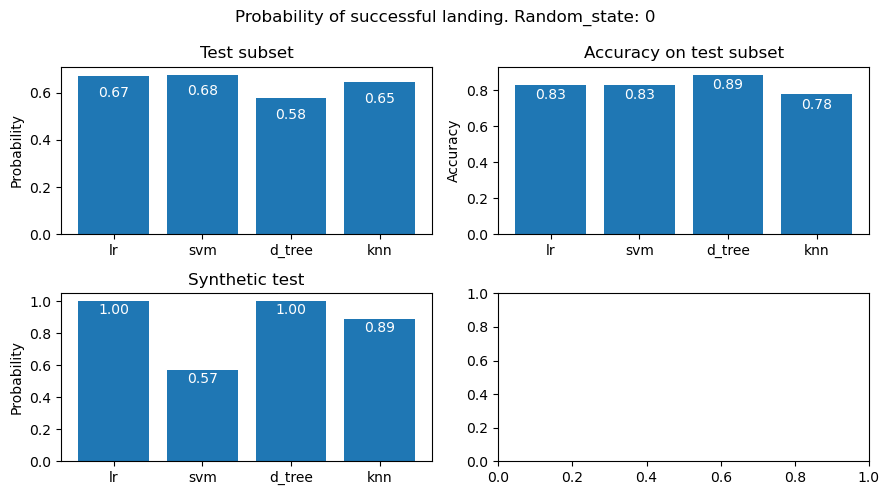

In [82]:
proba_test_mean_logreg = np.array([c[1] for c in logreg_cv.predict_proba(X_test)]).mean()
proba_test_mean_svm = np.array([c[1] for c in svm_cv.predict_proba(X_test)]).mean()
proba_test_mean_tree = np.array([c[1] for c in tree_cv.predict_proba(X_test)]).mean()
proba_test_mean_knn = np.array([c[1] for c in knn_cv.predict_proba(X_test)]).mean()


proba_test_mean_values = [proba_test_mean_logreg, proba_test_mean_svm, proba_test_mean_tree, proba_test_mean_knn]
proba_test_mean_synth_values = [proba_test_mean_synth_logreg, proba_test_mean_synth_svm, proba_test_mean_synth_tree, proba_test_mean_synth_knn]
model_names = ['lr', 'svm', 'd_tree', 'knn']


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

bars_0 = ax[0, 1].bar(model_names, models.values())
for bar, y_val in zip(bars_0, models.values()):
    ax[0, 1].text(
        bar.get_x() + bar.get_width()/2, 
        y_val - 0.1, 
        f'{y_val:.2f}', 
        ha='center', 
        va='bottom', 
        color='white'
    )
ax[0, 1].set_title('Accuracy on test subset')
ax[0, 1].set_ylabel('Accuracy')

bars_1 = ax[0, 0].bar(model_names, proba_test_mean_values)
for bar, y_val in zip(bars_1, proba_test_mean_values):
    ax[0, 0].text(
        bar.get_x() + bar.get_width()/2, 
        y_val - 0.1, 
        f'{y_val:.2f}', 
        ha='center', 
        va='bottom', 
        color='white'
    )
ax[0, 0].set_title('Test subset')
ax[0, 0].set_ylabel('Probability')

bars_2 = ax[1, 0].bar(model_names, proba_test_mean_synth_values)
for bar, y_val in zip(bars_2, proba_test_mean_synth_values):
    ax[1, 0].text(
        bar.get_x() + bar.get_width()/2, 
        y_val - 0.1, 
        f'{y_val:.2f}', 
        ha='center', 
        va='bottom', 
        color='white'
    )
ax[1, 0].set_title('Synthetic test')
ax[1, 0].set_ylabel('Probability')


fig.suptitle(f'Probability of successful landing. Random_state: {my_random_state}')
plt.tight_layout()
plt.show()

In [74]:
proba_test_mean_synth_values

[1.0, 0.5727212736753935, 1.0, 0.8921759259259259]

In [79]:
# proba_test_mean = proba_test_mean_logreg
# proba_test_mean_synth = proba_test_mean_synth_logreg
# proba_test_mean = proba_test_mean_svm
# proba_test_mean_synth = proba_test_mean_synth_svm
proba_test_mean = proba_test_mean_tree
proba_test_mean_synth = proba_test_mean_synth_tree
# proba_test_mean = proba_test_mean_knn
# proba_test_mean_synth = proba_test_mean_synth_knn
print('Mean probability of success in', X_test.shape[0], 'test subset:', proba_test_mean)
print('Mean probability of success in', X_synth_test.shape[0], 'synthetic test:', proba_test_mean_synth)

Mean probability of success in 18 test subset: 0.5772727272727273
Mean probability of success in 2700 synthetic test: 1.0


# Launch cost using random conditions
Calculated on test data subset  
And let's estimate the launch cost. For estimation we use base low price = $62 million, base high price = $165 million and mean probability of successful landing using test subset as features input for model. 

In [83]:
base_low = 62
base_high = 165
estimation_low = base_low / proba_test_mean
estimation_high = base_high / proba_test_mean
print(f'The launch price is between ${estimation_low:.1f} million and ${estimation_high:.1f} million')

The launch price is between $107.4 million and $285.8 million


# Launch cost using suggested conditions
Calculated on synthetic test  

In [84]:
base_low = 62
base_high = 165
estimation_low = base_low / proba_test_mean_synth
estimation_high = base_high / proba_test_mean_synth
print(f'The launch price is between ${estimation_low:.1f} million and ${estimation_high:.1f} million')

The launch price is between $62.0 million and $165.0 million
